<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/contrast/mergeall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd

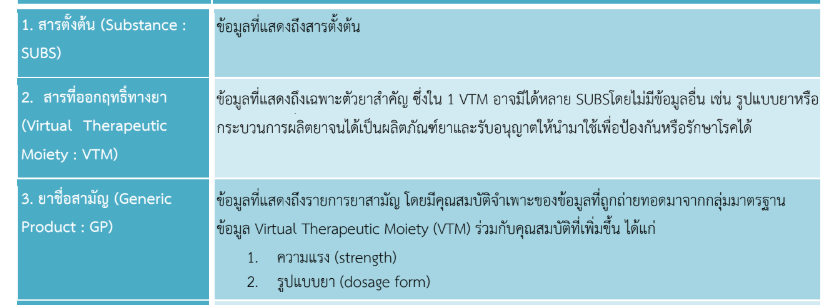

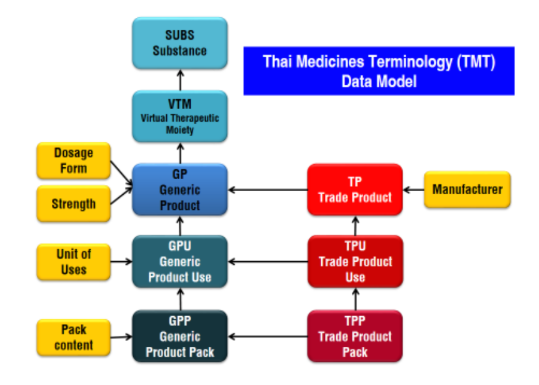

In [37]:
GP = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/GP20250217.xlsx')
VTM = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/VTM20250217.xls')
SUBS = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/SUBS20250217.xls')
TP = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/TP20250217.xls')
TPU = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/TPU20250217.xlsx')
GPU = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/GPU20250217.xls')
TP.head()

,TMTID(TP),FSN,MANUFACTURER,CHANGEDATE
0,1049227,0.0001% DPCP (F 12249) (diphenylcyclopropenone...,สถาบันโรคผิวหนัง,20190103
1,1049270,0.0005% DPCP (F 12249) (diphenylcyclopropenone...,สถาบันโรคผิวหนัง,20190103
2,1049329,0.001% DPCP (F 12249) (diphenylcyclopropenone ...,สถาบันโรคผิวหนัง,20190103
3,1049372,0.005% DPCP (F 12249) (diphenylcyclopropenone ...,สถาบันโรคผิวหนัง,20190103
4,1270843,0.01% ATROPINE EYE DROP 10 ML (M 13756) (atrop...,"จุฬาลงกรณ์ สภากาชาดไทย,รพ.",20230617


In [38]:
tp_tpu = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Relationship/TPtoTPU20250217.xls')
gp_tp = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Relationship/GPtoTP20250217.xls')
vtm_gp = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Relationship/VTMtoGP20250217.xls')
subs_vtm = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Relationship/SUBStoVTM20250217.xls')
gp_gpu = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Relationship/GPtoGPU20250217.xls')

In [39]:
import pandas as pd


merge_df = tp_tpu.merge(gp_tp, on='TPID', how='left')  # Merge TP with TPU
merge_df = merge_df.merge(vtm_gp, on='GPID', how='left')  # Merge GP
merge_df = merge_df.merge(subs_vtm, on='VTMID', how='left')  # Merge VTM
merge_df = merge_df.merge(gp_gpu[['GPID', 'GPUID']], on='GPID', how='left')
merge_df.head()

,TPID,TPUID,GPID,VTMID,SUBSID,GPUID
0,1323902,1323918,958607,958551,230434,958611
1,1323902,1323918,958607,958551,958533,958611
2,1323994,1324000,1323973,221685,665824,1323987
3,1323994,1324000,1323973,221685,224391,1323987
4,1324059,1324063,484701,484646,484622,484717


In [40]:
print(GP.columns)
print(TP.columns)
print(GPU.columns)
print(TPU.columns)
print(VTM.columns)
print(SUBS.columns)

Index(['TMTID(GP)', 'FSN', 'CHANGEDATE'], dtype='object')
Index(['TMTID(TP)', 'FSN', 'MANUFACTURER', 'CHANGEDATE'], dtype='object')
Index(['TMTID(GPU)', 'FSN', 'CHANGEDATE'], dtype='object')
Index(['TMTID(TPU)', 'FSN', 'MANUFACTURER', 'CHANGEDATE'], dtype='object')
Index(['TMTID(VTM)', 'FSN', 'CHANGEDATE'], dtype='object')
Index(['TMTID(SUBS)', 'FSN', 'CHANGEDATE'], dtype='object')


In [41]:
# Rename ID columns in merge_df to match FSN tables
merge_df = merge_df.rename(columns={
    'GPID': 'TMTID(GP)',
    'TPID': 'TMTID(TP)',
    'GPUID': 'TMTID(GPU)',
    'TPUID': 'TMTID(TPU)',
    'VTMID': 'TMTID(VTM)',
    'SUBSID': 'TMTID(SUBS)'  # If SUBID exists in relationships, otherwise use correct name
})

# Merge FSN columns from each file
merge_df = merge_df.merge(GP[['TMTID(GP)', 'FSN']], on='TMTID(GP)', how='left').rename(columns={'FSN': 'GPNAME'})
merge_df = merge_df.merge(TP[['TMTID(TP)', 'FSN']], on='TMTID(TP)', how='left').rename(columns={'FSN': 'TPNAME'})
merge_df = merge_df.merge(GPU[['TMTID(GPU)', 'FSN']], on='TMTID(GPU)', how='left').rename(columns={'FSN': 'GPUNAME'})
merge_df = merge_df.merge(TPU[['TMTID(TPU)', 'FSN']], on='TMTID(TPU)', how='left').rename(columns={'FSN': 'TPUNAME'})
merge_df = merge_df.merge(VTM[['TMTID(VTM)', 'FSN']], on='TMTID(VTM)', how='left').rename(columns={'FSN': 'VTMNAME'})
merge_df = merge_df.merge(SUBS[['TMTID(SUBS)', 'FSN']], on='TMTID(SUBS)', how='left').rename(columns={'FSN': 'SUBSNAME'})
merge_df.head(1)

,TMTID(TP),TMTID(TPU),TMTID(GP),TMTID(VTM),TMTID(SUBS),TMTID(GPU),GPNAME,TPNAME,GPUNAME,TPUNAME,VTMNAME,SUBSNAME
0,1323902,1323918,958607,958551,230434,958611,alogliptin 25 mg + pioglitazone 30 mg film-coa...,"OSENI 25 MG/30 MG TABLETS (CELLTRION PHARM, KO...",alogliptin 25 mg + pioglitazone 30 mg film-coa...,"OSENI 25 MG/30 MG TABLETS (CELLTRION PHARM, KO...",alogliptin + pioglitazone (VTM),pioglitazone (SUBS)


In [42]:
print(merge_df.shape)

(99753, 12)


In [43]:
merge_df.nunique()

,0
TMTID(TP),30871
TMTID(TPU),33327
TMTID(GP),8219
TMTID(VTM),2864
TMTID(SUBS),2278
TMTID(GPU),10671
GPNAME,8219
TPNAME,30871
GPUNAME,10671
TPUNAME,33327


In [44]:
merge_df.to_csv('all.csv', index=False)

In [ ]:
meditem = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/meditem 2025.xlsx')
meditem[['meditem','name','pres_nm','nameth','tradename','medunit','stdcode','tmtid']].head()

,meditem,name,pres_nm,nameth,tradename,medunit,stdcode,tmtid
0,1,ACETAZOLAMIDE 250MG TAB,ACETAZOLAMIDE 250MG TAB.,ยา อะเซททาโซลาไมด์ 250 มิลลิกรัม(C),DIAMOX*,1000'S,1.011760e+23,309279
1,7,***PSEUDO60MG+TIPOLIDINE2.5MG TAB,***ACTIFED TAB.,NaN,NaN,500,2.180501e+23,386801
2,13,ADRENALINE INJ. 1 MG/ML,ADRENALINE INJ. 1 MG/ML (H!!),(H!!)ยา อะดรีนาลีน 1 มก./มล.(C),ADRENALINE INJECTION 1 mg/ml 1 ml ampule,1 ML,1.003880e+23,537227
3,14,ALBENDAZOLE TAB. 200 MG,ALBENDAZOLE 200 MG TAB.,ยา อัลเบนดาโซล 200 มิลลิกรัม(C),NaN,100'S,1.000700e+23,666691
4,16,ALLOPURINOL 100MG TAB.,ALLOPURINOL 100 MG TAB.,ยา อัลโลพูรินอล 100 มิลลิกรัม(C),ALINOL TABLETS,500'S,1.000060e+23,234118


In [ ]:
merge_df.columns

Index(['TPID', 'TPUID', 'GPID', 'VTMID', 'SUBSID'], dtype='object')

In [ ]:
# Merge meditem (as reference) with merge_df on tmtid = TPUID
final_df = meditem.merge(merge_df, left_on='tmtid', right_on='TPUID', how='left')
final = final_df[['meditem','name','pres_nm','nameth','tradename','medunit','stdcode','tmtid','TPID', 'TPUID', 'GPID', 'VTMID', 'SUBSID']]
final.isnull().sum()

,0
meditem,0
name,0
pres_nm,0
nameth,123
tradename,1270
medunit,5
stdcode,1
tmtid,0
TPID,31
TPUID,31


In [ ]:
GP[GP['TMTID(GP)']==229027.0]

,TMTID(GP),FSN,CHANGEDATE
7351,229027,pseudoephedrine hydrochloride 60 mg + triproli...,20130805


In [ ]:
# Group by SUBSID and aggregate GPID and name as lists
grouped = final_df.groupby('SUBSID').apply(
    lambda x: pd.Series({
        'GPIDs': x['GPID'].unique(),           # Unique GPIDs for each SUBSID
        'Names': list(x['name'])                # Corresponding names for each GPID
    })
).reset_index()

grouped

<ipython-input-106-202c37fd155a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = final_df.groupby('SUBSID').apply(


,SUBSID,GPIDs,Names
0,223185.0,[210257.0],[ALENDRONATE 70MG TAB]
1,223222.0,"[780027.0, 689873.0, 817367.0, 884709.0, 82442...","[***ALUMINIUM HYDROXIDE 500MG TAB., ANTACID SU..."
2,223251.0,"[210448.0, 210476.0]","[AMLODIPINE 10 MG** TAB , AMLODIPINE 5 MG TAB]"
3,223308.0,"[810734.0, 768450.0]","[ASPIRIN 300 MG TAB, ASPIRIN 81 MG TAB]"
4,223312.0,[693910.0],[ATORVASTATIN 40 MG TAB]
...,...,...,...
658,1231332.0,[1231366.0],"[***MOLNUPIRAVIR 200MG CAP (สนับสนุน), MOLNUPI..."
659,1233086.0,[1233119.0],[PAXLOVID TAB(NIRMATREVIR 150MG+RITONAVIR 100MG)]
660,1241038.0,[1241064.0],[TIXAGEVIMAB 100MG + CILGAVIMAB 100MG VIAL INJ]
661,1241142.0,[1241174.0],[TIXAGEVIMAB 100MG + CILGAVIMAB 100MG VIAL INJ]


In [ ]:
final[(final['name']=='AMILORIDE+HCTZ TAB.')]

,meditem,name,pres_nm,nameth,tradename,medunit,stdcode,tmtid,TPID,TPUID,GPID,VTMID,SUBSID
7,25,AMILORIDE+HCTZ TAB.,AMILORIDE 5 MG +HCTZ 50 MG TAB.,ยา อะมิโลไรด์ 5มก.+ไฮโดรคลอโรไทอาไซด์ 50มก.(B),BILDURETIC,500'S,2.030302e+23,262926,262919.0,262926.0,238485.0,238471.0,238444.0
8,25,AMILORIDE+HCTZ TAB.,AMILORIDE 5 MG +HCTZ 50 MG TAB.,ยา อะมิโลไรด์ 5มก.+ไฮโดรคลอโรไทอาไซด์ 50มก.(B),BILDURETIC,500'S,2.030302e+23,262926,262919.0,262926.0,238485.0,238471.0,224362.0


In [ ]:
final[(final['name']=='KCL 15CC ELIXIR 20MEQ/15ML')]

,meditem,name,pres_nm,nameth,tradename,medunit,stdcode,tmtid,TPID,TPUID,GPID,VTMID,SUBSID
411,6281,KCL 15CC ELIXIR 20MEQ/15ML,KCL 15CC ELIXIR 20MEQ/15ML,ยา โพแทสเซียมคลอไรด์ 15 มล. 20 เอ็มอีคิว/15 มล...,KAYLYTE,15cc,1.009390e+23,702862,NaN,NaN,NaN,NaN,NaN
1617,39117,KCL 15CC ELIXIR 20MEQ/15ML,***KCL 15CC ELIXIR 20MEQ/15ML,ยา โพแทสเซียมคลอไรด์ 15 มล. 20 เอ็มอีคิว/15 มล...,NaN,ขวด,1.009390e+23,743290,743288.0,743290.0,731434.0,519509.0,519482.0


In [ ]:
tp = pd.read_excel('/content/drive/MyDrive/AIEngineer/contrast/tmt/Concept/TP20250217.xls')
tp.head()

,TMTID(TP),FSN,MANUFACTURER,CHANGEDATE
0,1049227,0.0001% DPCP (F 12249) (diphenylcyclopropenone...,สถาบันโรคผิวหนัง,20190103
1,1049270,0.0005% DPCP (F 12249) (diphenylcyclopropenone...,สถาบันโรคผิวหนัง,20190103
2,1049329,0.001% DPCP (F 12249) (diphenylcyclopropenone ...,สถาบันโรคผิวหนัง,20190103
3,1049372,0.005% DPCP (F 12249) (diphenylcyclopropenone ...,สถาบันโรคผิวหนัง,20190103
4,1270843,0.01% ATROPINE EYE DROP 10 ML (M 13756) (atrop...,"จุฬาลงกรณ์ สภากาชาดไทย,รพ.",20230617
